In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Part 1 - Exploratory Data Analysis

In [122]:
login_df = pd.read_json('logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [123]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [124]:
login_df.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [125]:
single_day = login_df[login_df['login_time'].dt.date == pd.to_datetime('1970-01-02').date()]
# login_df['login_time'].date()
single_day.describe()

,login_time
count,681
mean,1970-01-02 13:05:30.252569750
min,1970-01-02 00:01:54
25%,1970-01-02 05:09:31
50%,1970-01-02 12:48:32
75%,1970-01-02 20:52:55
max,1970-01-02 23:59:40


In [126]:
# login_df.set_index('login_time', inplace=True)

In [132]:
login_df['day_of_week'] = login_df['login_time'].dt.day_name()
login_df['day_of_week'].value_counts()
login_df['timestamp'] = pd.to_datetime(login_df['login_time'].dt.time.astype(str)).dt.time
login_df

/var/folders/k7/_jdxw9bx3_7cybsnkxz0pr200000gn/T/ipykernel_13998/525809980.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  login_df['timestamp'] = pd.to_datetime(login_df['login_time'].dt.time.astype(str)).dt.time


,login_time,day_of_week,timestamp
0,1970-01-01 20:13:18,Thursday,20:13:18
1,1970-01-01 20:16:10,Thursday,20:16:10
2,1970-01-01 20:16:37,Thursday,20:16:37
3,1970-01-01 20:16:36,Thursday,20:16:36
4,1970-01-01 20:26:21,Thursday,20:26:21
...,...,...,...
93137,1970-04-13 18:50:19,Monday,18:50:19
93138,1970-04-13 18:43:56,Monday,18:43:56
93139,1970-04-13 18:54:02,Monday,18:54:02
93140,1970-04-13 18:57:38,Monday,18:57:38


In [142]:
login_df['datetime'] = ('2020-01-01' + ' ' + login_df['timestamp'].astype(str))
login_df['datetime'] = pd.to_datetime(login_df['datetime'])
login_df.head()
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   login_time   93142 non-null  datetime64[ns]
 1   day_of_week  93142 non-null  object        
 2   timestamp    93142 non-null  object        
 3   datetime     93142 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 2.8+ MB


In [63]:
df_agg = login_df.resample('15T').size()
print(df_agg.sort_values(ascending=False).head(15))


login_time
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-01 23:30:00    60
1970-04-04 05:00:00    60
1970-04-04 04:45:00    59
1970-04-04 05:15:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
1970-04-04 01:00:00    54
1970-04-04 00:30:00    53
1970-03-17 01:30:00    53
1970-03-29 04:45:00    52
1970-03-08 04:45:00    51
dtype: int64


In [138]:
login_df.head()

,login_time,day_of_week,timestamp,datetime
0,1970-01-01 20:13:18,Thursday,20:13:18,2020-01-01 20:13:18
1,1970-01-01 20:16:10,Thursday,20:16:10,2020-01-01 20:16:10
2,1970-01-01 20:16:37,Thursday,20:16:37,2020-01-01 20:16:37
3,1970-01-01 20:16:36,Thursday,20:16:36,2020-01-01 20:16:36
4,1970-01-01 20:26:21,Thursday,20:26:21,2020-01-01 20:26:21


In [150]:
mon_df = login_df[login_df['day_of_week'] == 'Monday']
tue_df = login_df[login_df['day_of_week'] == 'Tuesday']
wed_df = login_df[login_df['day_of_week'] == 'Wednesday']
thur_df = login_df[login_df['day_of_week'] == 'Thursday']
fri_df = login_df[login_df['day_of_week'] == 'Friday']
sat_df = login_df[login_df['day_of_week'] == 'Saturday']
sun_df = login_df[login_df['day_of_week'] == 'Sunday']

<class 'pandas.core.frame.DataFrame'>
Index: 8823 entries, 2372 to 93141
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   login_time   8823 non-null   datetime64[ns]
 1   day_of_week  8823 non-null   object        
 2   timestamp    8823 non-null   object        
 3   datetime     8823 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 344.6+ KB


In [163]:
def agg_15min(df):
    index_df = df.set_index('datetime')
    agged_df = index_df.resample('15T').size()
    return agged_df


In [166]:
mon_agg = agg_15min(mon_df)
tue_agg = agg_15min(tue_df)
wed_agg = agg_15min(wed_df)
thur_agg = agg_15min(thur_df)
fri_agg = agg_15min(fri_df)
sat_agg = agg_15min(sat_df)
sun_agg = agg_15min(sun_df)


In [154]:
def plt_day(df, day):
#     agg_df['datetime'] = df.index.time
    agg_df = df.set_index('datetime')
    resample_df = agg_df.resample('15T').size()
    plt.figure(figsize=(15,10))
    plt.plot(resample_df)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
    plt.title(day)
    plt.xlabel('Time - 15-min intervals')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

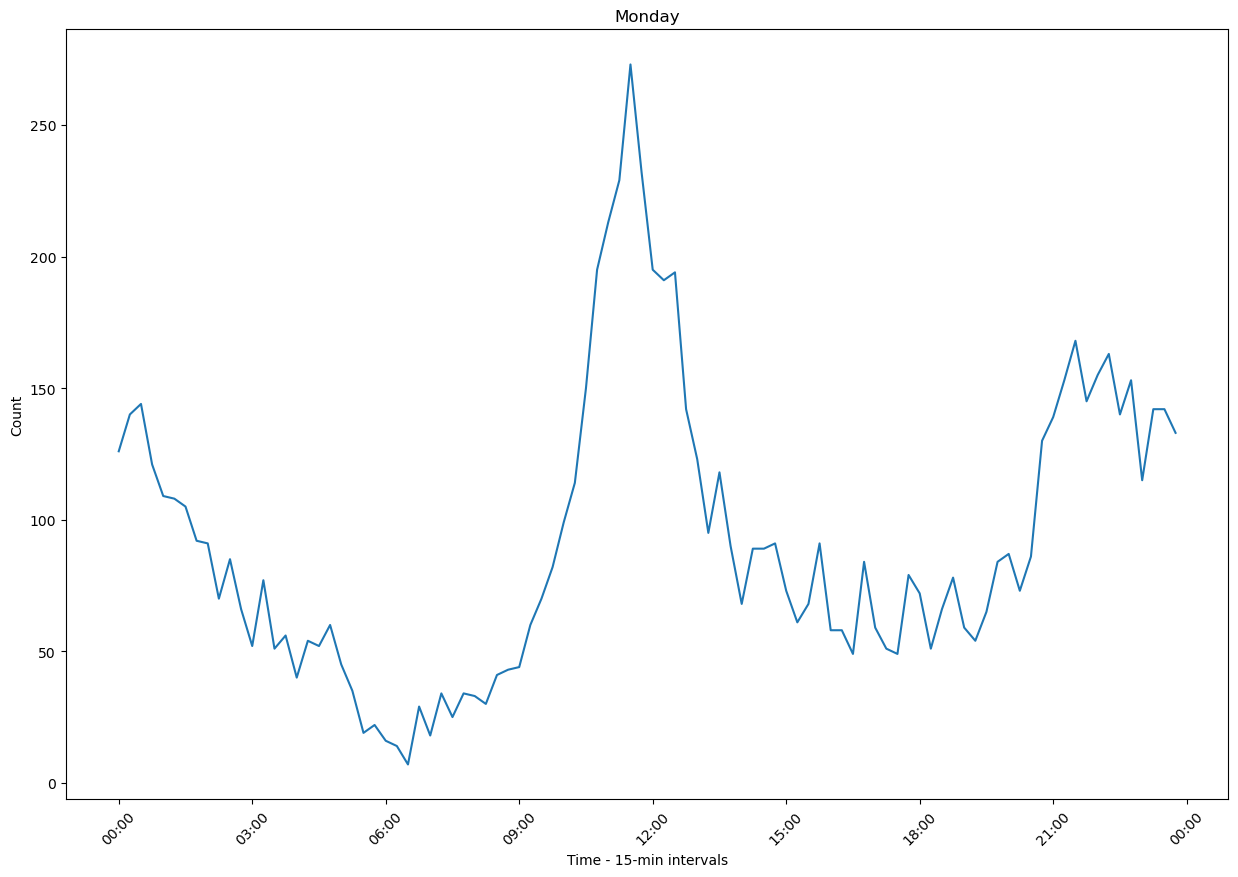

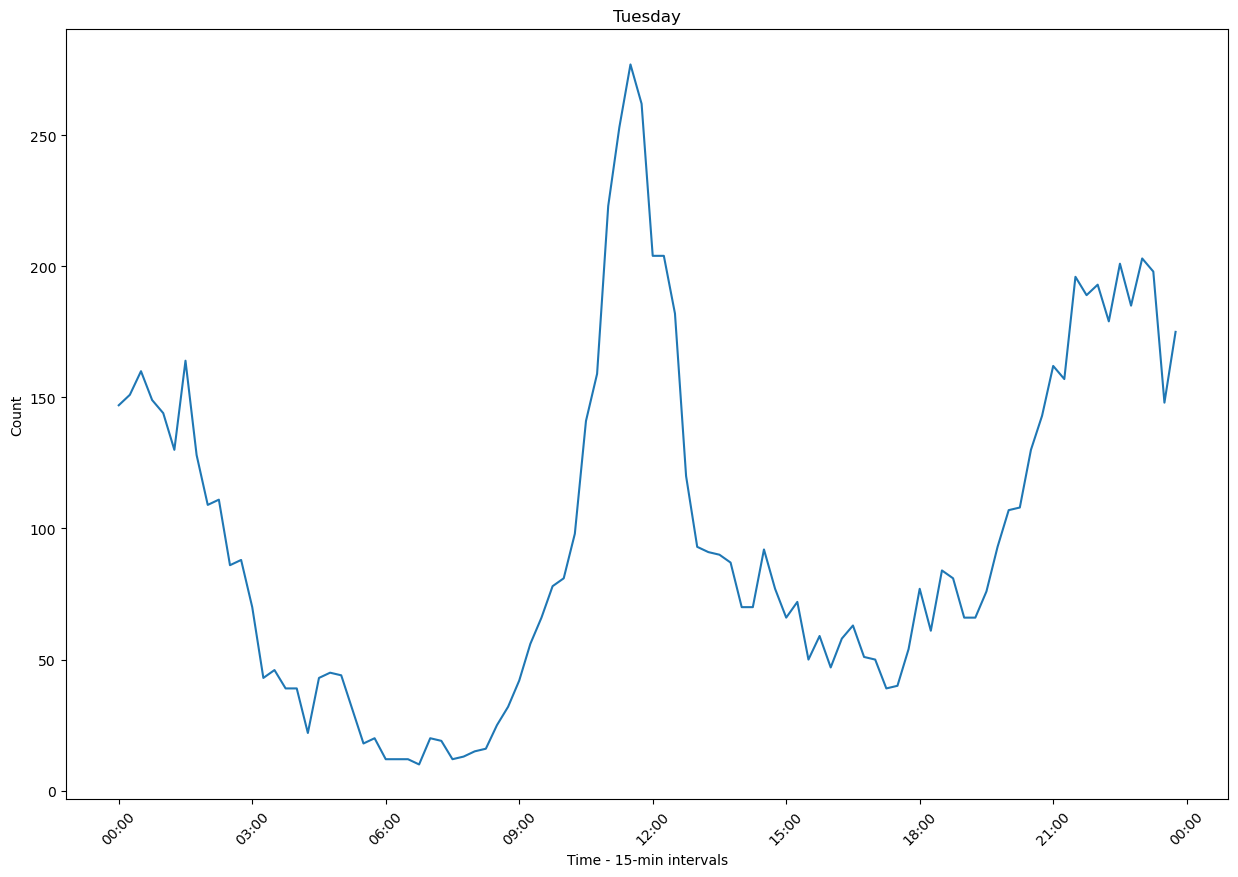

In [162]:
plt_day(mon_df, 'Monday')

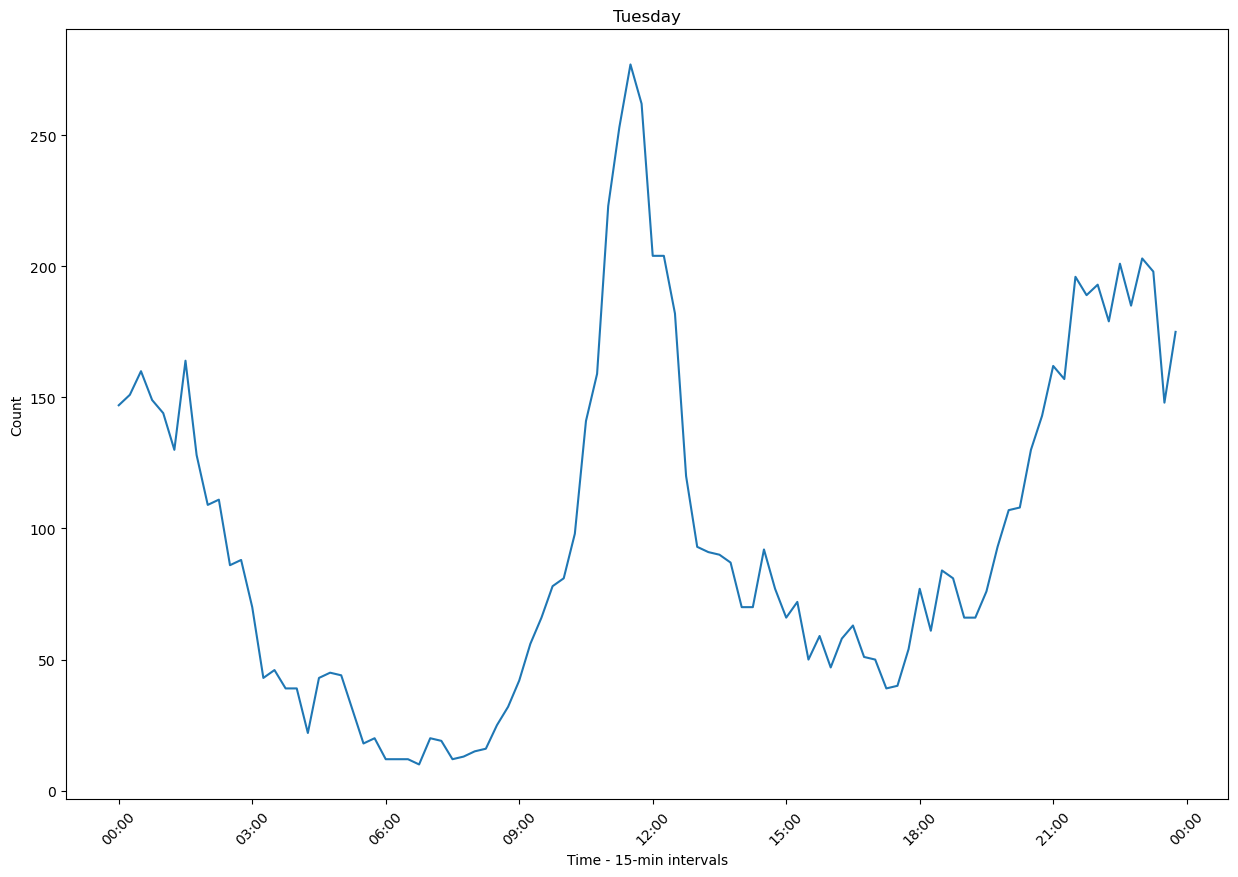

In [156]:
plt_day(tue_df, 'Tuesday')

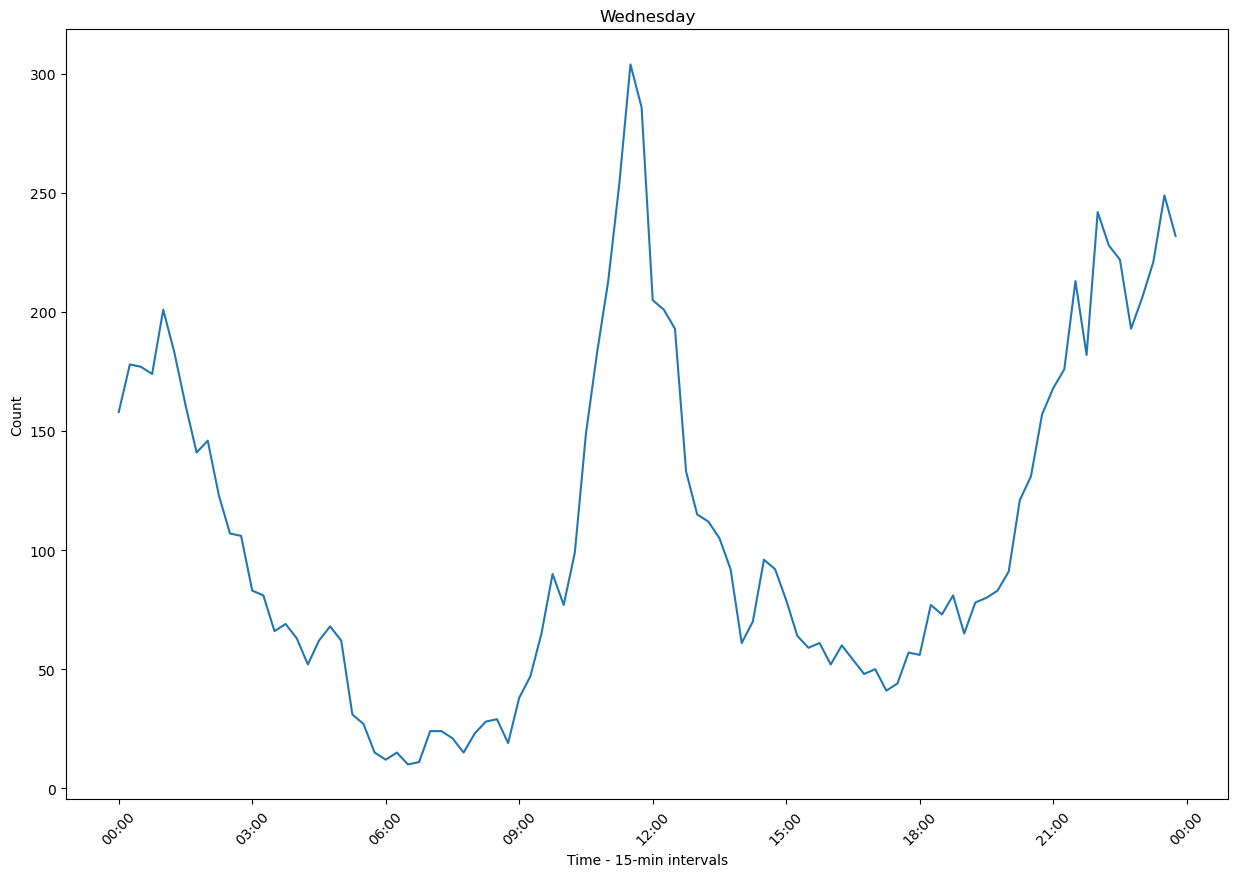

In [157]:
plt_day(wed_df, 'Wednesday')

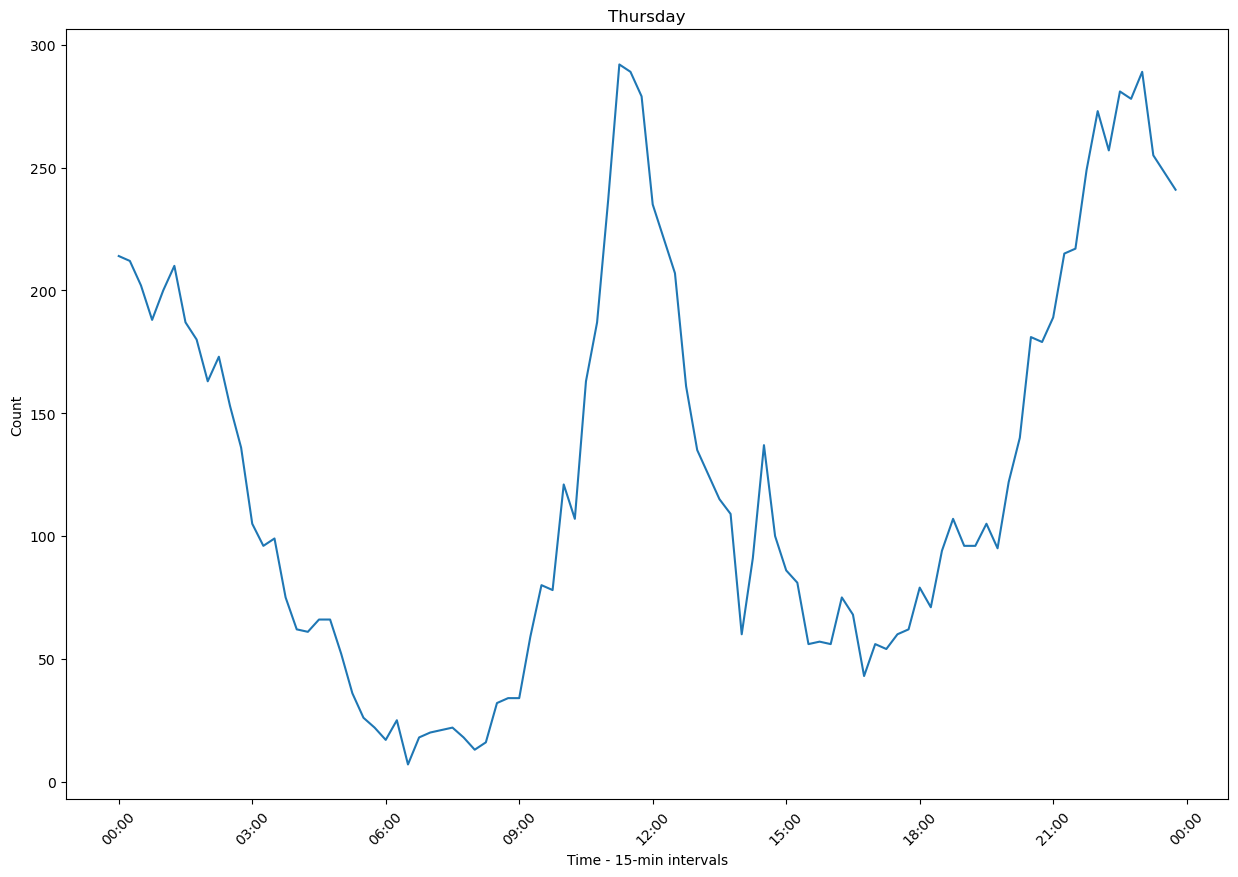

In [158]:
plt_day(thur_df, 'Thursday')

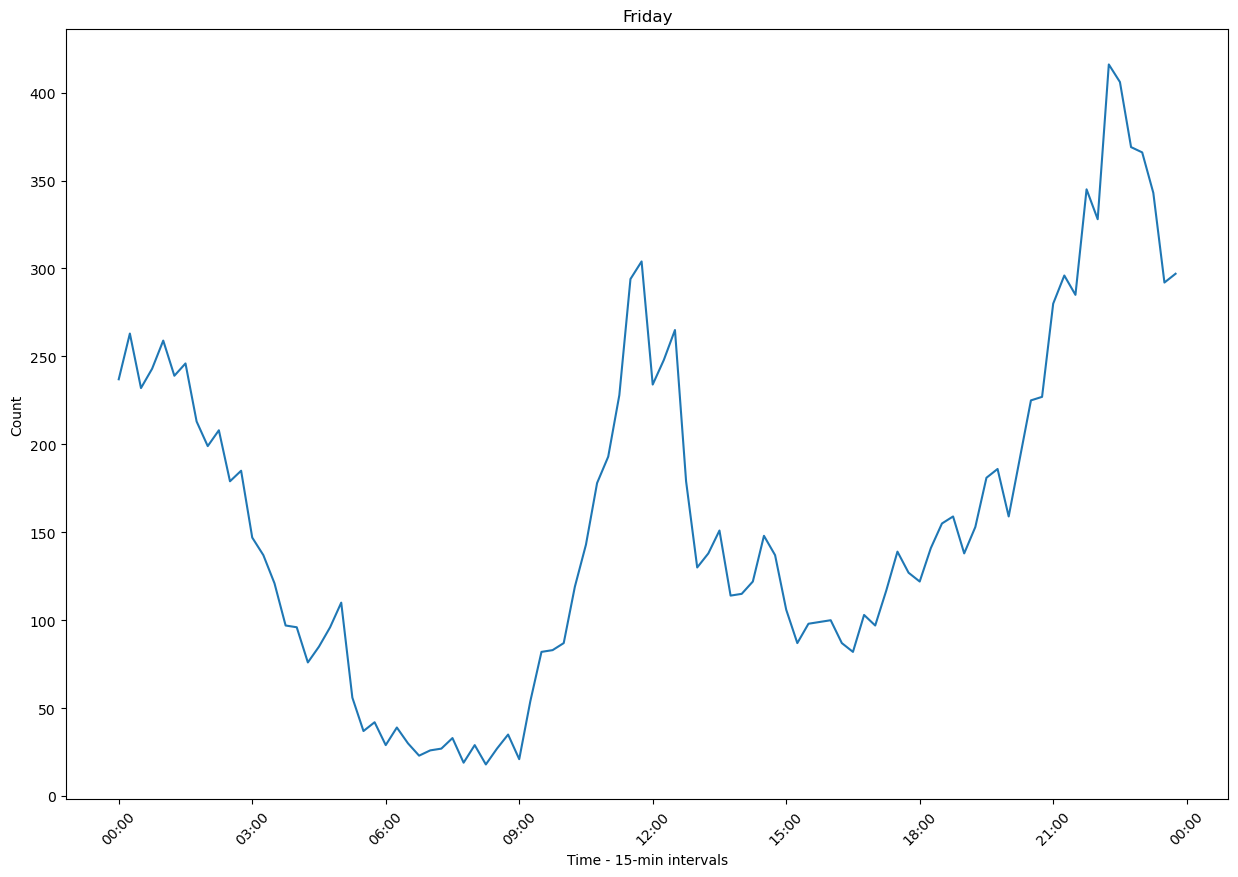

In [159]:
plt_day(fri_df, 'Friday')

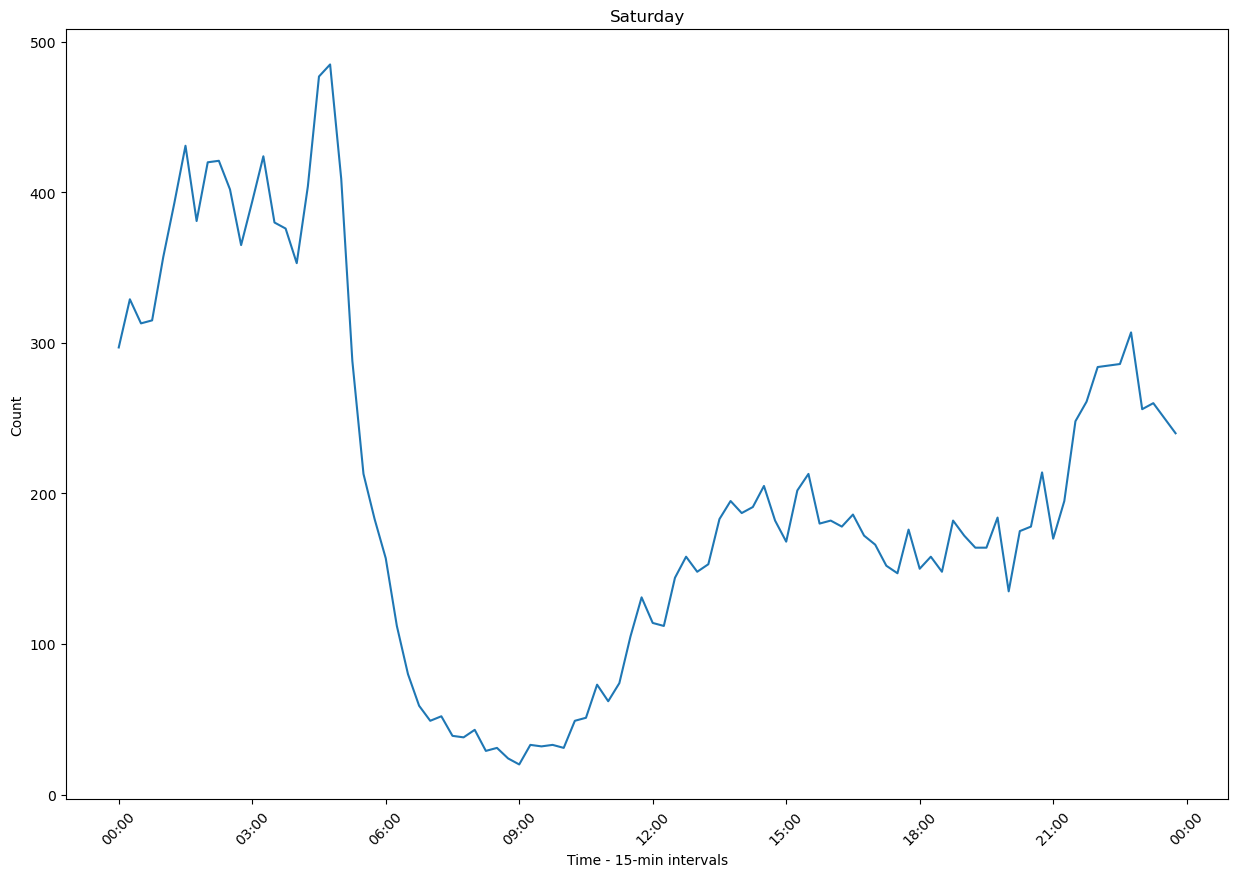

In [160]:
plt_day(sat_df, 'Saturday')

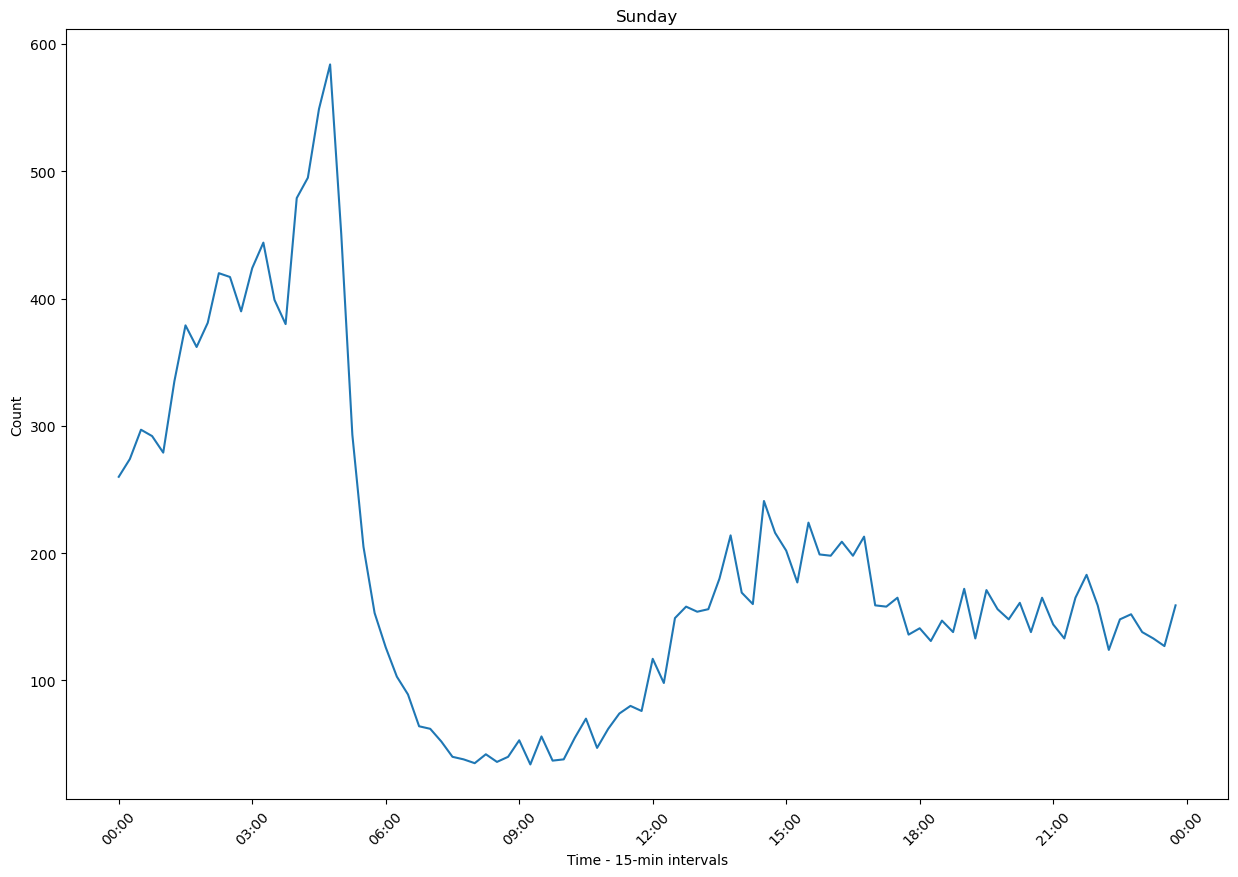

In [161]:
plt_day(sun_df, 'Sunday')

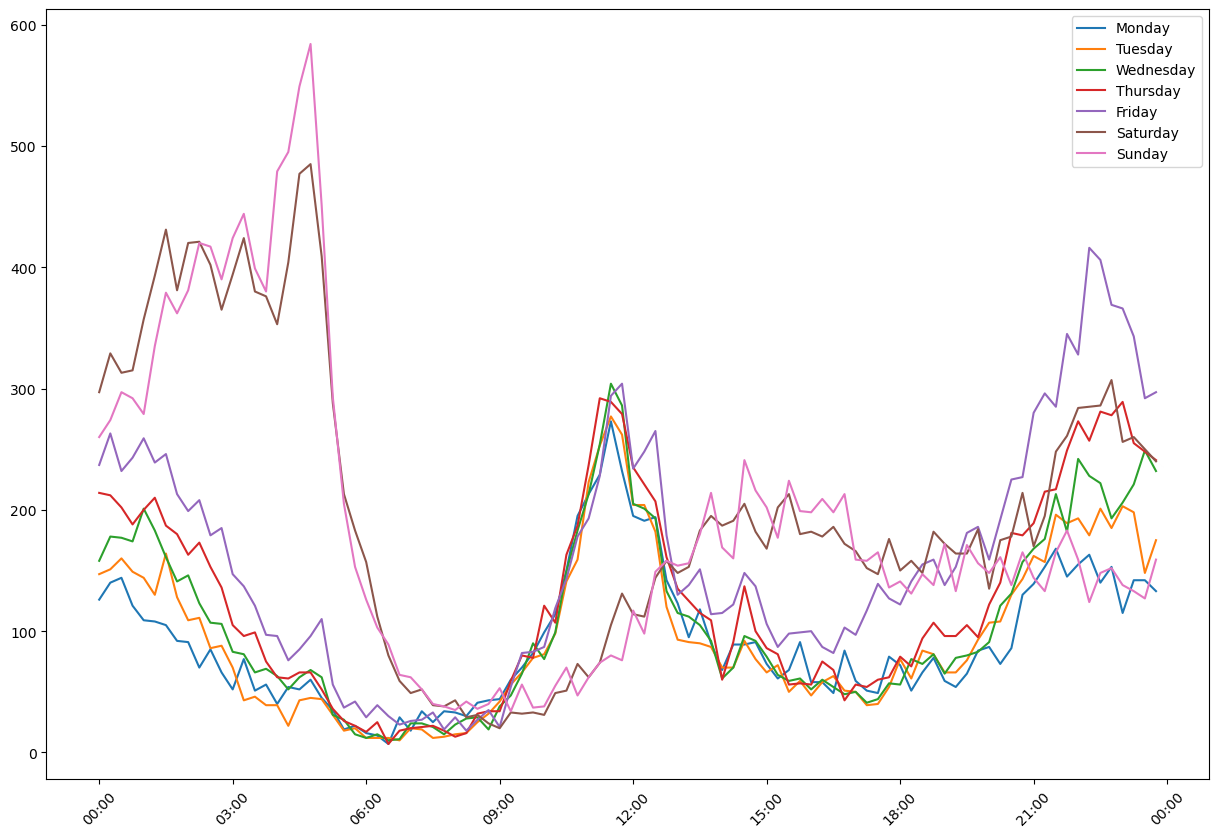

In [173]:
plt.figure(figsize=(15,10))
plt.plot(mon_agg, label='Monday')
plt.plot(tue_agg, label='Tuesday')
plt.plot(wed_agg, label='Wednesday')
plt.plot(thur_agg, label='Thursday')
plt.plot(fri_agg, label='Friday')
plt.plot(sat_agg, label='Saturday')
plt.plot(sun_agg, label='Sunday')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.legend()

What I have found in the login data is that there is a slight variation in activity depending on what day of the week it is. Below are some of my findings:
- Monday through Wednesday follow a similar pattern with larger volume in the morning and at the end of the day with a spike in the middle. Around 9 or 10am we see volume increase until just before 12pm. Activity drops until around 7pm, peaking again around 10-11pm and then slowly dropping until around 6am where it begins picking up again.
- Thursday follows a similar schedule as Monday through Wednesday, but shows a considerably larger spike towards the end of the day, still peaking around 10-11pm.
- Friday sees some of that larger spike from Thursday night and then follows a similar pattern as Thursday, with a larger spike at the end of the day than Monday through Wednesday.
- Saturday and Sunday follow a slightly different pattern showing large amounts of activity in the morning.  As opposed to slowly falling off until around 6am, Saturday and Sunday see the largest amount of activity just before 6am.  It is also important to note that there is the most site activity over the week.

<h1> Part 2 - Experiment and metrics design
   

1.
   <p> I believe a key metric of success would be seeing the combined number of rides given increasing.  If Gotham and Metropolis follow complementary schedules during the week, then drivers in each city sit dormant during hours of less demand.  However, if a driver has an incentive (or lack of decentive, ie. paying for the toll), then they would be willing to travel to the neighboring city and give rides to make more money.  Additionally, with more drivers in each city during hours of high demand, surges will decrease leading to more users.  For this reason, if you were to see the number of combined rides being completing increase, then I believe this would be a success. <p>

2. First, I would make sure I very clearly understand what the current metrics of drives being done in both cities.  This would give me a baseline to begin running a test against.  I would run a one-tailed t-test to test if the new total number of rides given is statistically different from what was previously being tested.  The null hypothesis would state that there is no statistical difference after implementing this incentive and the goal would be to reject this hypothesis.  I would start my experiment by promoting the new incentive of toll reimbursements for a full month before going live to give drivers sufficient heads up of the new program. Once live, I would track the total numbers of rides given over the subsequent month.  With updated means and std deviations, if the p-value comes back less than .05 (running with a 95% confidence test), then we can reject the null hypothesis and determine the number of overall rides increased with this incentive.  The last portion of truly understanding whether or not this was successful would be to double check the revenue brought in from this incentive against the costs of the reimbursements to each driver.

<h1> Part 3 - Predictive Modeling
   

<h3> 1. Cleaning/EDA

In [178]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [187]:
#update dates to datetime objects
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
#it appears this data was pulled on 2014-07-01, meaning anyone that has not taken a ride since 2014-06-01 would be
#considered not retained
df.sort_values('last_trip_date', ascending=False)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4486,Winterfell,4,2014-01-25,5.0,1.00,2014-07-01,Android,0.0,True,25.0,11.94,5.0
43047,King's Landing,1,2014-01-15,5.0,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,4.7
24059,Astapor,1,2014-01-24,4.3,1.11,2014-07-01,iPhone,14.3,False,71.4,8.62,4.9
40290,King's Landing,2,2014-01-07,4.9,1.02,2014-07-01,iPhone,1.6,True,95.2,7.51,4.8
28689,King's Landing,5,2014-01-16,5.0,1.00,2014-07-01,iPhone,0.0,False,75.0,16.32,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23907,Winterfell,1,2014-01-01,5.0,3.00,2014-01-01,Android,100.0,False,100.0,3.36,5.0
47804,Astapor,1,2014-01-01,NaN,1.00,2014-01-01,Android,0.0,True,100.0,7.17,5.0
11578,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,Android,0.0,True,100.0,18.63,5.0
11573,Astapor,1,2014-01-01,NaN,1.25,2014-01-01,iPhone,100.0,False,100.0,2.47,5.0


In [190]:
cutoff_date = pd.to_datetime('2014-06-01')

In [193]:
df[['avg_rating_of_driver', 'avg_rating_by_driver']].describe()

,avg_rating_of_driver,avg_rating_by_driver
count,41878.000000,49799.000000
mean,4.601559,4.778158
std,0.617338,0.446652
min,1.000000,1.000000
25%,4.300000,4.700000
50%,4.900000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [199]:
df['phone'].fillna('iPhone', inplace=True)
print(df['phone'].value_counts())

phone
iPhone     34978
Android    15022
Name: count, dtype: int64


In [204]:
#fill in remaining missing values with the mean of each related series
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [207]:
df['retained'] = (df['last_trip_date'] >= cutoff_date).astype(int)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

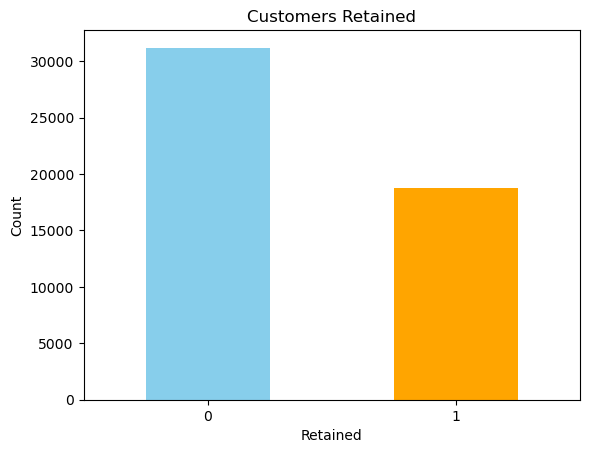

In [218]:
df['retained'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Customers Retained')
plt.xlabel('Retained')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [232]:
print(df['retained'].value_counts())
retained_p = round(18804/50000*100,2)
not_retained_p = round(31196/50000*100,2)
print('amount retained ', retained_p, '\ncustomers lost: ',  not_retained_p)

retained
0    31196
1    18804
Name: count, dtype: int64
amount retained  37.61 
customers lost:  62.39


Text(0, 0.5, 'Count')

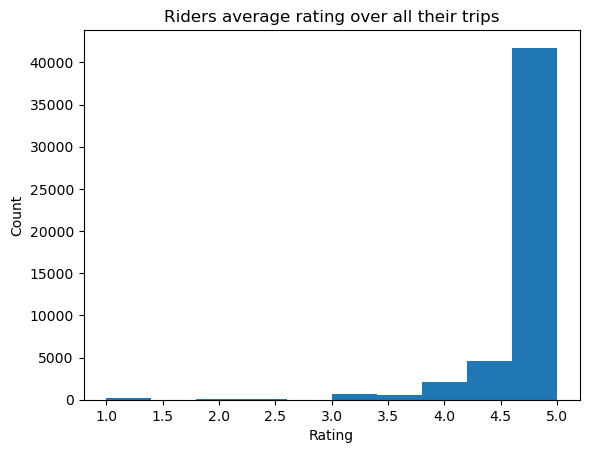

In [223]:
plt.hist(df['avg_rating_by_driver'], bins=10)
plt.title('Riders average rating over all their trips')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

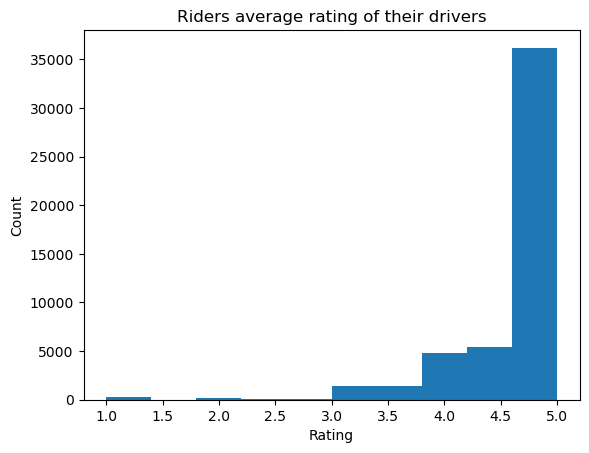

In [224]:
plt.hist(df['avg_rating_of_driver'], bins=10)
plt.title('Riders average rating of their drivers')
plt.xlabel('Rating')
plt.ylabel('Count')

<Axes: xlabel='retained', ylabel='avg_dist'>

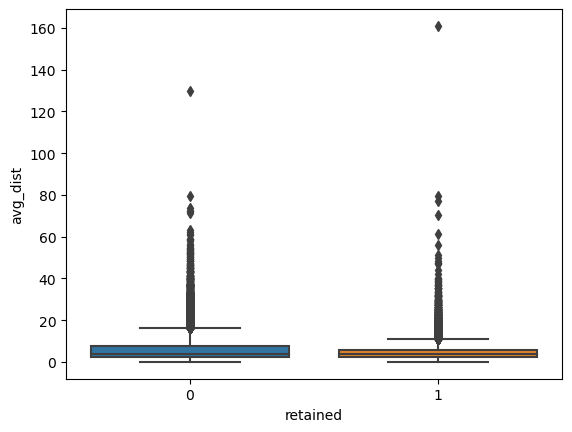

In [240]:
sns.boxplot(data=df, x='retained', y='avg_dist')

<Axes: xlabel='retained', ylabel='weekday_pct'>

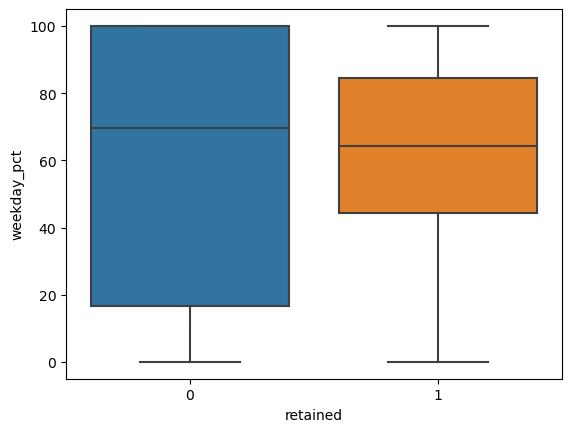

In [241]:
sns.boxplot(data=df, x='retained', y='weekday_pct')

<Axes: xlabel='retained', ylabel='avg_surge'>

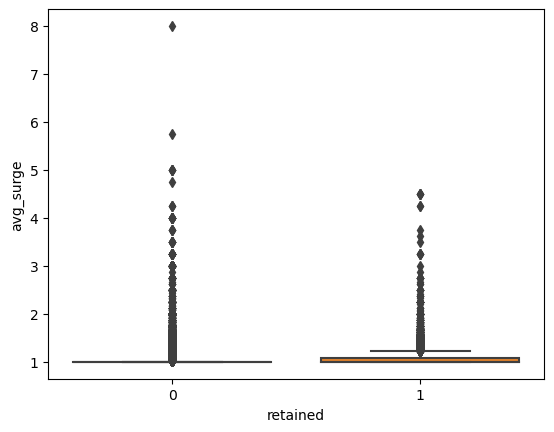

In [242]:
sns.boxplot(data=df, x='retained', y='avg_surge')

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [283]:
X = df.drop(columns=['retained', 'signup_date', 'last_trip_date'])
y = df['retained']
X = pd.get_dummies(X, drop_first=True)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 42)

In [285]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)

In [286]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [287]:
y_pred = rf_model.predict(X_test)

In [288]:
print(confusion_matrix(y_test, y_pred))

[[6318 1482]
 [1593 3107]]


In [289]:
print(accuracy_score(y_test, y_pred))

0.754


In [290]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      7800
           1       0.68      0.66      0.67      4700

    accuracy                           0.75     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.75      0.75      0.75     12500



In [291]:
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))

avg_dist                  0.298374
weekday_pct               0.129685
avg_rating_by_driver      0.120057
surge_pct                 0.083975
avg_rating_of_driver      0.080474
trips_in_first_30_days    0.078027
avg_surge                 0.066133
city_King's Landing       0.061762
phone_iPhone              0.034774
ultimate_black_user       0.030962
city_Winterfell           0.015777
dtype: float64


In [273]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 250],
         'max_depth': [None, 3, 5, 10],
         'criterion': ['gini', 'entropy']}

rf_model2 = RandomForestClassifier(random_state=45)

In [274]:
grid_search = GridSearchCV(estimator=rf_model2, param_grid=params, cv=5, scoring='accuracy')

In [275]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'n_estimators': [50, 100, 250]},
             scoring='accuracy')

In [276]:
print('Best Hyperparameters: ', grid_search.best_params_)
print('Best Accuracy Score: ', grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 250}
Best Accuracy Score:  0.7848266666666667


<h3> Best Model

In [292]:
rf_model3 = RandomForestClassifier(n_estimators=250, max_depth=10, criterion='entropy')

In [293]:
rf_model3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=250)

In [294]:
y_pred = rf_model3.predict(X_test)

In [295]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7800
           1       0.74      0.66      0.70      4700

    accuracy                           0.78     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.78      0.78      0.78     12500



In [296]:
importances = rf_model3.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))

avg_rating_by_driver      0.171148
weekday_pct               0.138849
city_King's Landing       0.137551
surge_pct                 0.127309
avg_surge                 0.087799
phone_iPhone              0.079078
avg_dist                  0.073829
trips_in_first_30_days    0.069890
ultimate_black_user       0.061453
avg_rating_of_driver      0.037287
city_Winterfell           0.015807
dtype: float64


3. The model I decided to create determines if we can expect a user to be active in the next 30 days based on the data already collected.  I created a column that identified if a customer was currently retained (active in the last 30 days) vs. inactive and then proceded to build out a binary classifcation model.  I was able to create a model that predited to 78% accuracy whether or not a customer would stay.  Most importantly, I was able to determine from multiple models that the two most important criterion regarding customer retention appear to be the avg distance and the average rating by driver.  Knowing these are of high importance to customer retention, further evaluation can be done and Ultimate can create better forecast for revenue projections that will allow them to make more insightful decisions.